In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial
import seaborn as sns
import pymc3 as pm
from tqdm import tqdm_notebook as tqdm
import theano.tensor as tt
import os

/Users/melmccurrie/anaconda3/envs/metric_py3/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/Users/melmccurrie/anaconda3/envs/metric_py3/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
from psych_metric.datasets.volcano.dataset import SimulatedVolcanoMultinomial
from psych_metric.metrics.volcano.metric import VolcanoMetricMultinomialEM, VolcanoMetricMultinomialMC

In [3]:
ROOT = os.environ['ROOT']
HERE = os.path.join(ROOT, 'psych_metric', 'metrics', 'volcano')
np.set_printoptions(suppress=True)

# Generate Fake Data

In [4]:
posterior = np.array([
    [0.8, 0.1, 0.1],
    [0.2, 0.1, 0.7],
    [0.1, 0.8, 0.1],
])
prior = np.array([0.5, 0.3, 0.2])

ds = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,15],
    N=500
)

### Use EM to Recover the Parameters

In [5]:
Metric = VolcanoMetricMultinomialEM(n_classes=3)

In [6]:
Metric.train(ds.X)

Divergence: 0.4051320922451389
Divergence: 0.059690013076807
Divergence: 0.07242802898505361
Divergence: 0.0


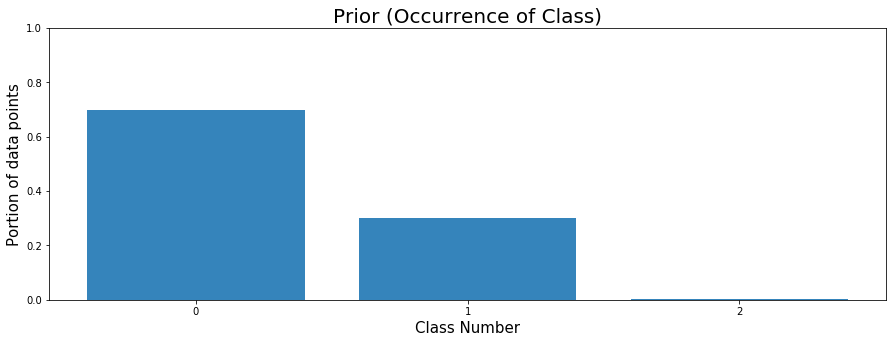

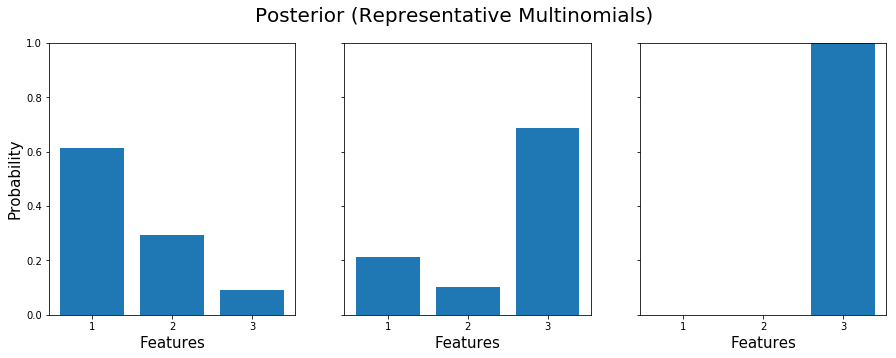

In [7]:
Metric.plot_prior()
Metric.plot_posterior()

### Use Monte Carlo Sampling to recover Parameters

In [14]:
Metric = VolcanoMetricMultinomialMC(n_classes=3)

In [15]:
Metric.train(ds.X)

/home/mel/anaconda3/envs/metric_py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Sequential sampling (1 chains in 1 job)
CompoundStep
>NUTS: [H, prior]
>CategoricalGibbsMetropolis: [category]
100%|██████████| 2300/2300 [04:21<00:00,  8.78it/s]
The acceptance probability does not match the target. It is 0.9290588587809577, but should be close to 0.8. Try to increase the number of tuning steps.
Only one chain was sampled, this makes it impossible to run some convergence checks


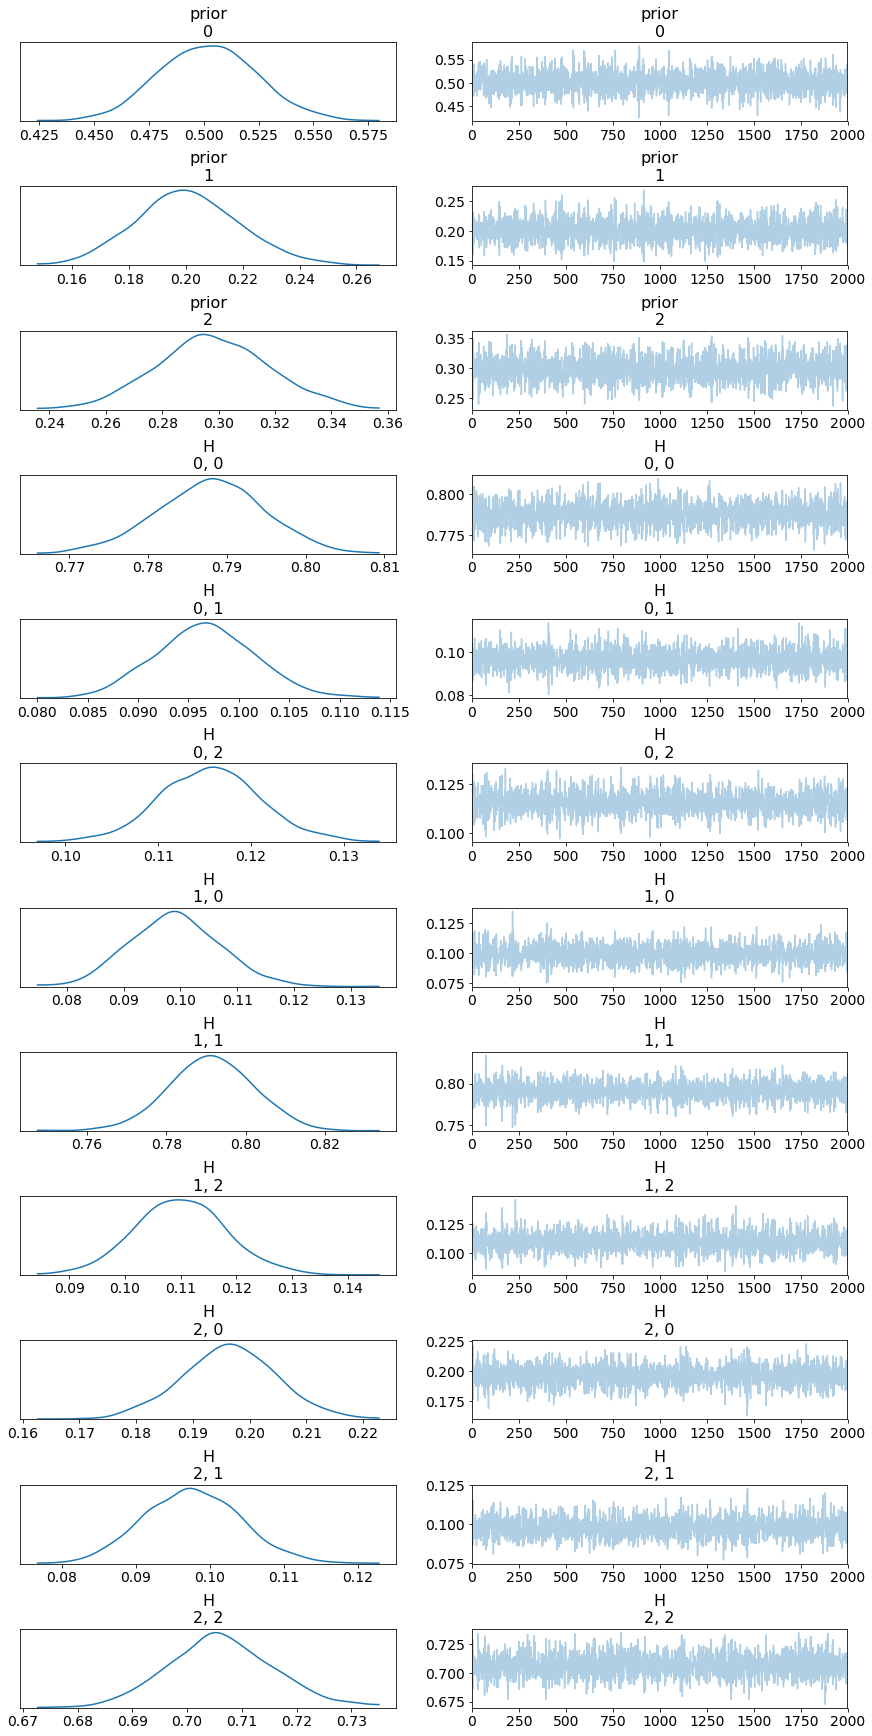

In [16]:
Metric.plot_posterior_pymc3()

# Save the Model

In [8]:
Metric.save(os.path.join(HERE, 'model.json'))

# Load Saved Model

In [9]:
Metric = VolcanoMetricMultinomialEM(save_file=os.path.join(HERE, 'model.json'))

# Analyze New Data

In [8]:
posterior = np.array([
    [0.8, 0.1, 0.1],
    [0.2, 0.1, 0.7],
    [0.1, 0.8, 0.1],
])
prior = np.array([0.5, 0.3, 0.2])

ds = SimulatedVolcanoMultinomial(
    posterior=posterior,
    prior=prior,
    n_annos=[15,15],
    N=5
)

new_data = ds.X

In [9]:
new_data

array([[13,  0,  2],
       [13,  0,  2],
       [ 2,  1, 12],
       [ 4,  1, 10],
       [ 2, 13,  0]])

In [10]:
# calculate prob of each class
Metric.predict_proba(new_data)

array([[0.9999749 , 0.0000251 , 0.        ],
       [0.9999749 , 0.0000251 , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.00000081, 0.99999919, 0.        ],
       [0.99999995, 0.00000005, 0.        ]])

In [11]:
# calculate which class (argmax of probs)
Metric.predict(new_data)

array([0, 0, 1, 1, 0])